# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"
### LGMVIP August-22
## AUTHOR - Nipun Jain
### Advanced Level Task
### TASK-7- Develop A Neural Network That Can Read Handwriting :
#### Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

### Dataset link : https://en.wikipedia.org/wiki/MNIST_database

### Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

### Loading Dataset

In [38]:
(x_train, y_train) ,(x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Plotting Count Plot

<AxesSubplot:ylabel='count'>

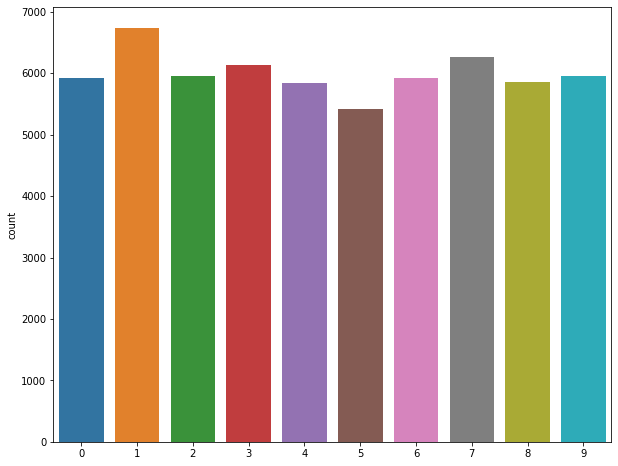

In [39]:
plt.figure(figsize = (10,8))
sns.countplot(x = y_train)

### Visualizing Data

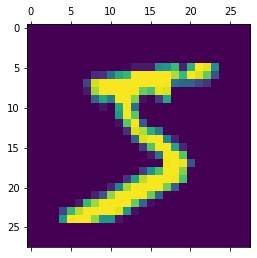

In [40]:
plt.matshow(x_train[0])

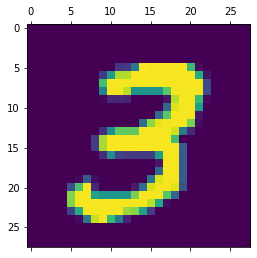

In [41]:
plt.matshow(x_train[7])

In [42]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Pre-processing Data

In [43]:
x_train = x_train/255
x_test = x_test/255

In [44]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [45]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Creating the model

In [46]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               80100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [48]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### Training the model

In [49]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1603 - accuracy: 0.9500 - val_loss: 0.0555 - val_accuracy: 0.9833
Epoch 2/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0518 - val_accuracy: 0.9833
Epoch 3/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0433 - val_accuracy: 0.9877
Epoch 4/5
1500/1500 [==============================] - 64s 42ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0463 - val_accuracy: 0.9861
Epoch 5/5
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0408 - val_accuracy: 0.9893


### Saving and loading the model

In [50]:
model.save('MNIST_Project.h5')

In [51]:
from keras.models import load_model
model = load_model('MNIST_Project.h5')

### Evaluating model

In [52]:
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy", acc)
print('Test Loss', loss)

313/313 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.99 - 4s 12ms/step - loss: 0.0328 - accuracy: 0.9903
Test Accuracy 0.9902999997138977
Test Loss 0.03277112916111946


In [53]:
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
print(cm)

tf.Tensor(
[[ 978    0    0    0    0    0    0    1    0    1]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   2    1 1016    1    0    0    1   10    1    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    1    0    0  972    0    0    0    0    9]
 [   1    0    0    7    0  880    2    1    1    0]
 [   6    2    0    0    0    6  943    0    0    1]
 [   0    1    0    1    0    0    0 1023    1    2]
 [   5    1    2    1    0    2    0    5  951    7]
 [   0    0    0    0    3    1    0    2    0 1003]], shape=(10, 10), dtype=int32)


### Plotting Heat map

Text(69.0, 0.5, 'Actual')

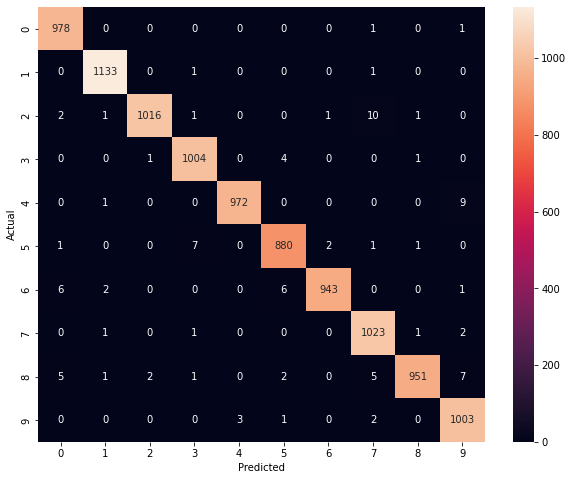

In [54]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Testing model

Predicted Value :  1
Correct Output


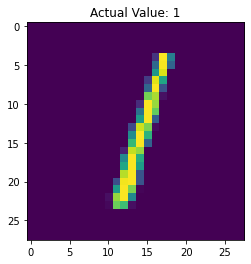

In [63]:
plt.imshow(x_test[2])
plt.title('Actual Value: {}'.format(y_test[2]))
pred = model.predict(x_test)

print('Predicted Value : ', np.argmax(pred[2]))
if(y_test[2] == (np.argmax(pred[2]))):
    print("Correct Output")
else:
    print("Incorrect Output")

Predicted Value :  9
Correct Output


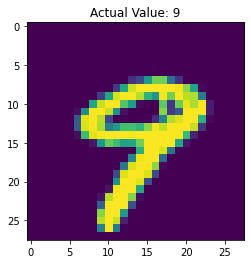

In [66]:
plt.imshow(x_test[9])
plt.title('Actual Value: {}'.format(y_test[9]))
pred = model.predict(x_test)
print('Predicted Value : ', np.argmax(pred[9]))
if(y_test[9] == (np.argmax(pred[9]))):
    print("Correct Output")
else:
    print("Incorrect Output")